In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(os.path.join('ML-Datasets', 'laptop_data.csv'))
df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
551,551,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.9kg,59513.2272
275,275,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,37992.3696
720,720,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.17kg,89864.1792
718,718,Mediacom,Notebook,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350 1.92GHz,4GB,32GB HDD,Intel HD Graphics 400,Windows 10,1.4kg,14119.2000
1122,1122,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg,80612.6400
664,664,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.7kg,79215.1056
401,401,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.9kg,81465.1200
1229,1229,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,61218.7200
927,927,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.31kg,62071.2000
1153,1153,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050Ti,Windows 10,2.62kg,63882.7200


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.duplicated().sum()

29

In [8]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [12]:
df['Ram'] = df['Ram'].apply(lambda x: str(x).replace('GB', str()))
df['Weight'] = df['Weight'].apply(lambda x: str(x).replace('kg', str()))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [14]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

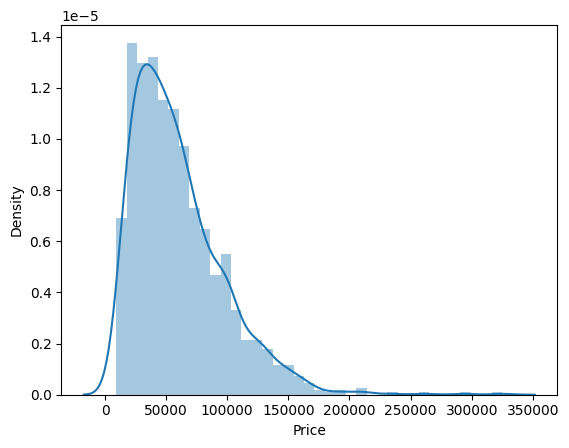

In [18]:
sns.distplot(df['Price'])

<AxesSubplot: >

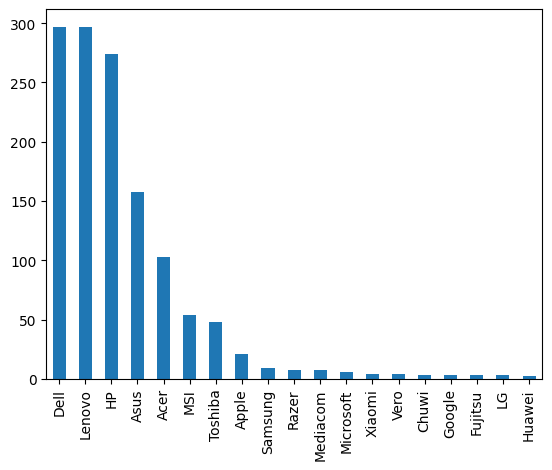

In [21]:
df['Company'].value_counts().plot(kind='bar')

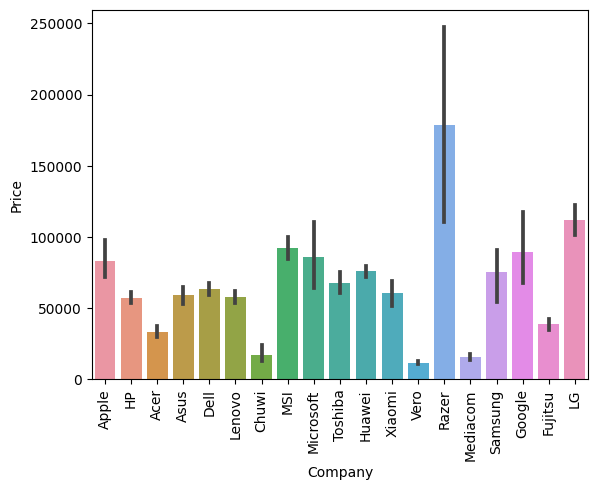

In [22]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

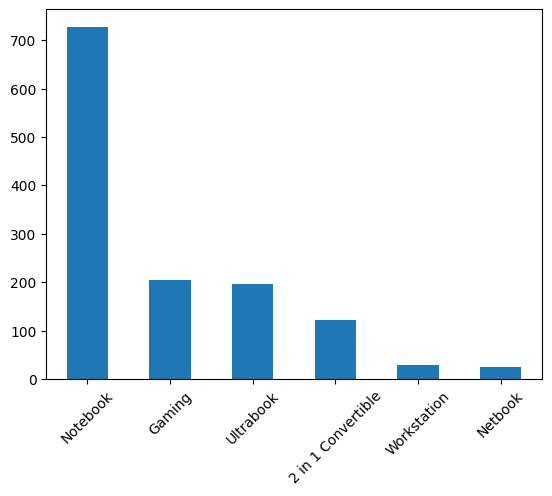

In [26]:
df['TypeName'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

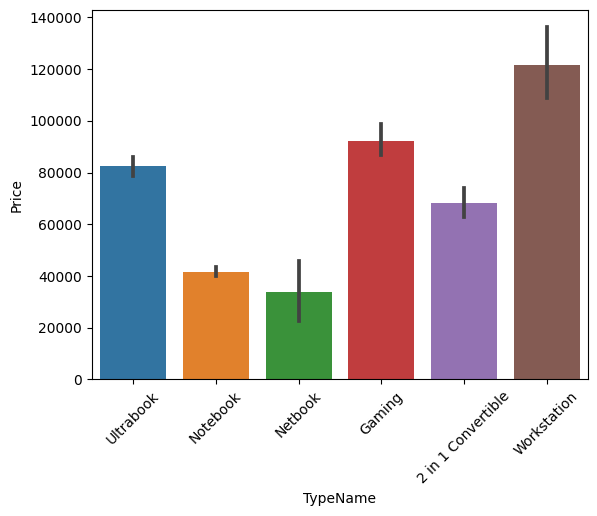

In [27]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<AxesSubplot: xlabel='Inches', ylabel='Density'>

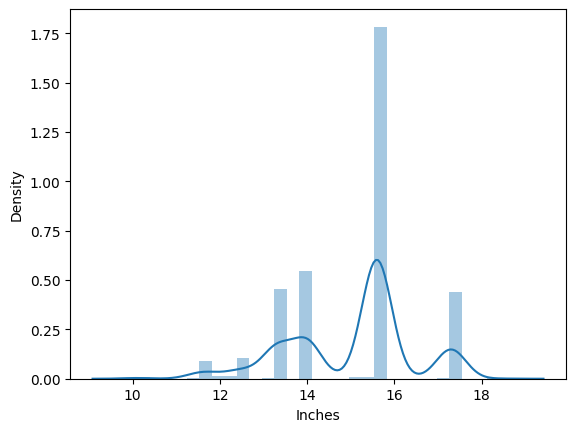

In [30]:
sns.distplot(df['Inches'])

<AxesSubplot: xlabel='Inches', ylabel='Price'>

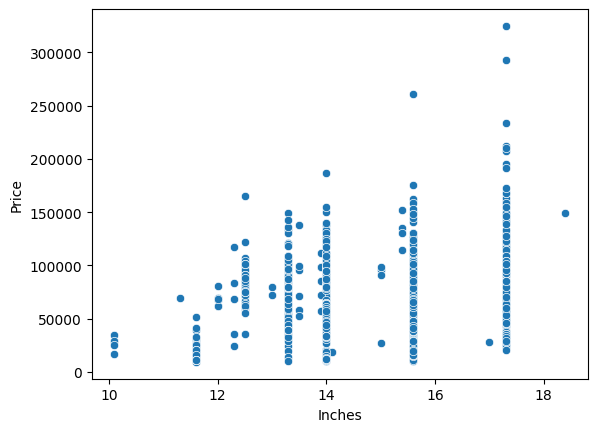

In [31]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [32]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [35]:
temp_df = df[['Company', 'TypeName', 'ScreenResolution']]
temp_df.head()

,Company,TypeName,ScreenResolution
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600
1,Apple,Ultrabook,1440x900
2,HP,Notebook,Full HD 1920x1080
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600


In [42]:
temp_df['TouchScreen'] = temp_df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
temp_df.head()

C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\2157314385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['TouchScreen'] = temp_df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)


,Company,TypeName,ScreenResolution,TouchScreen
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,0
1,Apple,Ultrabook,1440x900,0
2,HP,Notebook,Full HD 1920x1080,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,0


In [45]:
temp_df.sample(5)

,Company,TypeName,ScreenResolution,TouchScreen
766,Asus,Notebook,1366x768,0
418,Dell,Notebook,1366x768,0
1154,Dell,Notebook,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,1
888,Acer,Netbook,IPS Panel 1366x768,0
570,HP,Workstation,1600x900,0


<AxesSubplot: >

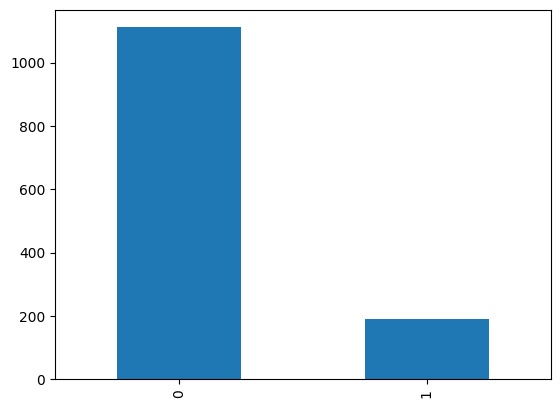

In [46]:
temp_df['TouchScreen'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='TouchScreen', ylabel='Price'>

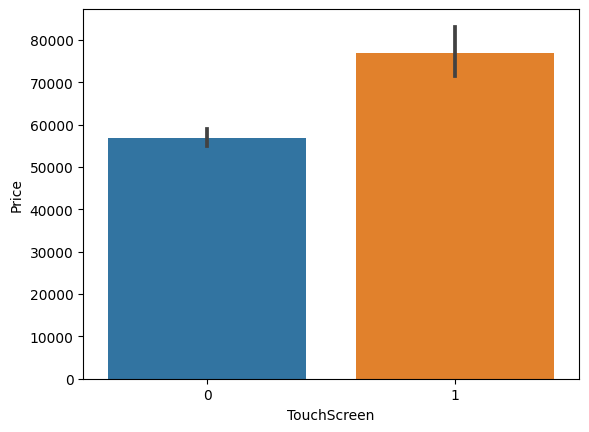

In [47]:
sns.barplot(x=temp_df['TouchScreen'], y=df['Price'])

In [48]:
temp_df['Price'] = df['Price'].copy()

C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\716223922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Price'] = df['Price'].copy()


In [50]:
temp_df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
temp_df.sample(8)

C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\3570330297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)


,Company,TypeName,ScreenResolution,TouchScreen,Price,IPS
551,Dell,Notebook,Full HD 1920x1080,0,59513.2272,0
208,Dell,Ultrabook,Full HD 1920x1080,0,77202.7200,0
297,Dell,Workstation,Full HD 1920x1080,0,153705.3408,0
347,Dell,Ultrabook,Full HD 1920x1080,0,85672.1088,0
77,Dell,Notebook,Full HD 1920x1080,0,45554.4000,0
979,Asus,Gaming,Full HD 1920x1080,0,93186.7200,0
1017,Lenovo,Notebook,IPS Panel 4K Ultra HD 3840x2160,0,158135.0400,1
878,Dell,Notebook,Full HD 1920x1080,0,48618.0000,0


<AxesSubplot: >

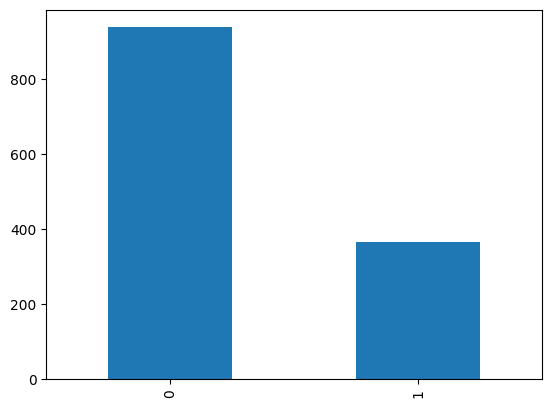

In [51]:
temp_df['IPS'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='IPS', ylabel='Price'>

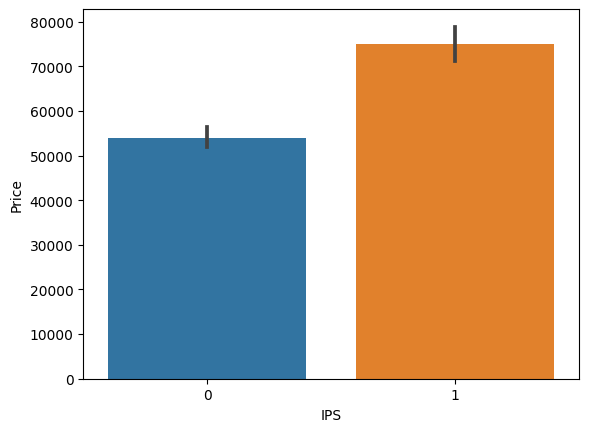

In [52]:
sns.barplot(x=temp_df['IPS'], y=temp_df['Price'])

In [54]:
temp_df['X_Res'] = temp_df['ScreenResolution'].apply(lambda x: str(x).split('x')[0].split(' ')[-1])
temp_df['Y_Res'] = temp_df['ScreenResolution'].apply(lambda x: str(x).split('x')[1])
temp_df.head()

C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\1493769874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['X_Res'] = temp_df['ScreenResolution'].apply(lambda x: str(x).split('x')[0].split(' ')[-1])
C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\1493769874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Y_Res'] = temp_df['ScreenResolution'].apply(lambda x: str(x).split('x')[1])


,Company,TypeName,ScreenResolution,TouchScreen,Price,IPS,X_Res,Y_Res
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,0,71378.6832,1,2560,1600
1,Apple,Ultrabook,1440x900,0,47895.5232,0,1440,900
2,HP,Notebook,Full HD 1920x1080,0,30636.0000,0,1920,1080
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,0,135195.3360,1,2880,1800
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,0,96095.8080,1,2560,1600


In [55]:
temp_df['X_Res'] = temp_df['X_Res'].astype('int')
temp_df['Y_Res'] = temp_df['Y_Res'].astype('int')

C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\3520747014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['X_Res'] = temp_df['X_Res'].astype('int')
C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\3520747014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Y_Res'] = temp_df['Y_Res'].astype('int')


In [56]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   ScreenResolution  1303 non-null   object 
 3   TouchScreen       1303 non-null   int64  
 4   Price             1303 non-null   float64
 5   IPS               1303 non-null   int64  
 6   X_Res             1303 non-null   int32  
 7   Y_Res             1303 non-null   int32  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 71.4+ KB


In [57]:
temp_df['Inches'] = df['Inches']
temp_df['PPI'] = np.divide(np.power(np.add(np.power(temp_df['X_Res'], 2), np.power(temp_df['Y_Res'], 2)), 0.5), temp_df['Inches']).astype('float')
temp_df.head()

C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\3390586479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Inches'] = df['Inches']
C:\Users\ShrikantViswanathan\AppData\Local\Temp\ipykernel_11412\3390586479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['PPI'] = np.divide(np.power(np.add(np.power(temp_df['X_Res'], 2), np.power(temp_df['Y_Res'], 2)), 0.5), temp_df['Inches']).astype('float')


,Company,TypeName,ScreenResolution,TouchScreen,Price,IPS,X_Res,Y_Res,Inches,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,0,71378.6832,1,2560,1600,13.3,226.983005
1,Apple,Ultrabook,1440x900,0,47895.5232,0,1440,900,13.3,127.677940
2,HP,Notebook,Full HD 1920x1080,0,30636.0000,0,1920,1080,15.6,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,0,135195.3360,1,2880,1800,15.4,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,0,96095.8080,1,2560,1600,13.3,226.983005


In [59]:
df['PPI'] = temp_df['PPI']
df['TouchScreen'], df['IPS'] = temp_df['TouchScreen'], temp_df['IPS']
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,0,1


In [60]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [62]:
df['Cpu_Name'] = df['Cpu'].apply(lambda x: " ".join(str(x).split(' ')[:3]))
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu_Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,0,1,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,0,1,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,0,1,Intel Core i5


In [63]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [65]:
df['Cpu_Name'] = df['Cpu_Name'].apply(fetch_processor)

In [67]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,TouchScreen,IPS,Cpu_Name
833,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,63190.0800,157.350512,0,0,Intel Core i5
1225,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,16463.5200,100.454670,0,0,Other Intel Processor
1008,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,55904.5728,157.350512,0,0,Intel Core i5
1029,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,57542.4000,127.335675,0,0,Intel Core i5
421,Chuwi,Notebook,12.3,IPS Panel Retina Display 2736x1824,Intel Celeron Quad Core N3450 1.1GHz,6,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.40,23922.7200,267.338436,0,1,Other Intel Processor
